Solution as provided by Capt Justin Merrick, CSCE 623, SP2019
with minor modifications by Dr. Borghetti, 7 May 2020

In [5]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as col

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

from IPython.display import Markdown as md


#below is an optional package which could help prevent label overlaps in your graphs.  see https://github.com/Phlya/adjustText
from adjustText import adjust_text
# if you dont have adjustText in your python distro, see adjustText installation instructions here:  https://github.com/Phlya/adjustText

In [11]:
#stolen helper functions from solution
def class_scatter(data):
    """Plots scatterplot of data with X1 feature on x-axis, X2 feature on x-axis, color-coded to class
        - Params: data - dataset with 2 predictor variables and a class variable with 2 classes"""
    
    colors = ['red','blue']
    plt.scatter(data.X1, data.X2, c=data.Class, cmap=col.ListedColormap(colors))
    plt.xlabel('X1')
    plt.ylabel('X2')
    cb = plt.colorbar()
    cb.set_ticks([0.25,0.75])
    cb.set_ticklabels(['Class 0','Class 1'])
    plt.show();
    
def data_toplevel(data):
    class_scatter(data)
    display(md('Data Statistics:'))
    display(data.describe())
    display(md('Class 0 Statistics:'))
    display(data.loc[data.Class==0,:].describe())
    display(md('Class 1 Statistics:'))
    display(data.loc[data.Class==1,:].describe())
    display(md('Covariance of Class 0:'))
    display(data.loc[data.Class==0,['X1','X2']].cov())
    display(md('Covariance of Class 1:'))
    display(data.loc[data.Class==1,['X1','X2']].cov())
    sns.pairplot(data)
    data.loc[data.Class==0,:].hist(grid=False, layout=(1,3), figsize=(12,4));
    data.loc[data.Class==1,:].hist(grid=False, layout=(1,3), figsize=(12,4));

# Steps 1, 2, and 3 - Load, explore, and discuss the datasets (1-3)
note that this step combines these actions for all 3 datasets

## Step 1 and 2:  Load and explore Dataset 1

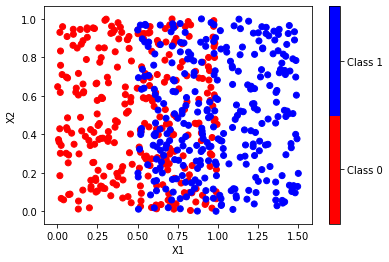

Data Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.747401,0.494678,0.500000
std,0.380747,0.296411,0.500417
min,0.002703,0.000546,0.000000
25%,0.510941,0.244774,0.000000
50%,0.730347,0.466113,0.500000
75%,0.984056,0.754525,1.000000
max,1.499809,0.999278,1.000000


Class 0 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.499781,0.496625,0.0
std,0.286360,0.300674,0.0
min,0.002703,0.004695,0.0
25%,0.253867,0.242792,0.0
50%,0.519936,0.457914,0.0
75%,0.724439,0.762296,0.0
max,0.994401,0.998847,0.0


Class 1 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.995021,0.492732,1.0
std,0.292195,0.292575,0.0
min,0.500664,0.000546,1.0
25%,0.749720,0.246140,1.0
50%,0.975708,0.481389,1.0
75%,1.246680,0.747359,1.0
max,1.499809,0.999278,1.0


Covariance of Class 0:

,X1,X2
X1,0.082002,-0.001860
X2,-0.001860,0.090405


Covariance of Class 1:

,X1,X2
X1,0.085378,0.003886
X2,0.003886,0.085600


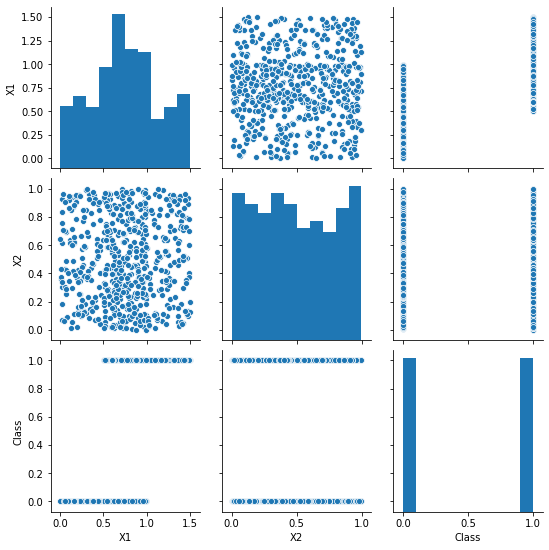

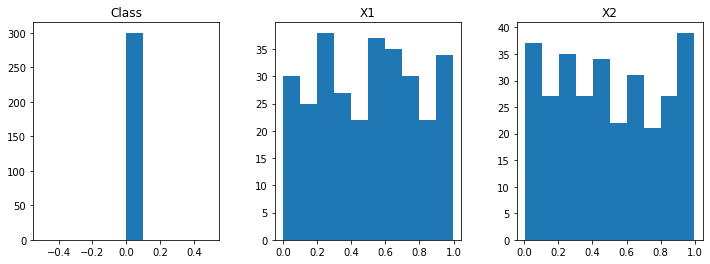

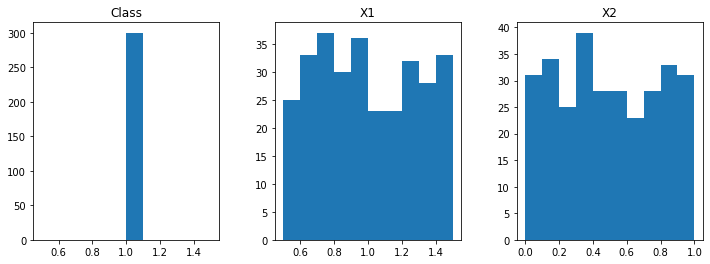

In [12]:
data1 = pd.read_csv('datset1.csv', header=0, names=['X1','X2','Class'], index_col=0)
data_toplevel(data1)  

## Step 3: Dataset 1 Discussion

## Step 1 and 2:  Load and Explore Dataset 2

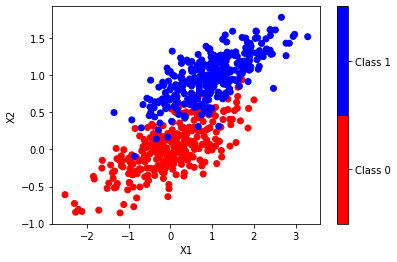

Data Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.473725,0.495420,0.500000
std,0.951497,0.576779,0.500417
min,-2.528299,-0.856548,0.000000
25%,-0.152288,0.018048,0.000000
50%,0.460075,0.515972,0.500000
75%,1.121963,0.973737,1.000000
max,3.290265,1.786571,1.000000


Class 0 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,-0.020282,0.014036,0.0
std,0.827376,0.326269,0.0
min,-2.528299,-0.856548,0.0
25%,-0.548454,-0.183206,0.0
50%,0.015693,0.018753,0.0
75%,0.507965,0.200593,0.0
max,2.002337,0.941891,0.0


Class 1 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.967732,0.976804,1.0
std,0.799657,0.308217,0.0
min,-1.352680,-0.090780,1.0
25%,0.407415,0.765874,1.0
50%,0.952037,0.974333,1.0
75%,1.436953,1.193200,1.0
max,3.290265,1.786571,1.0


Covariance of Class 0:

,X1,X2
X1,0.684551,0.189066
X2,0.189066,0.106452


Covariance of Class 1:

,X1,X2
X1,0.639451,0.175940
X2,0.175940,0.094998


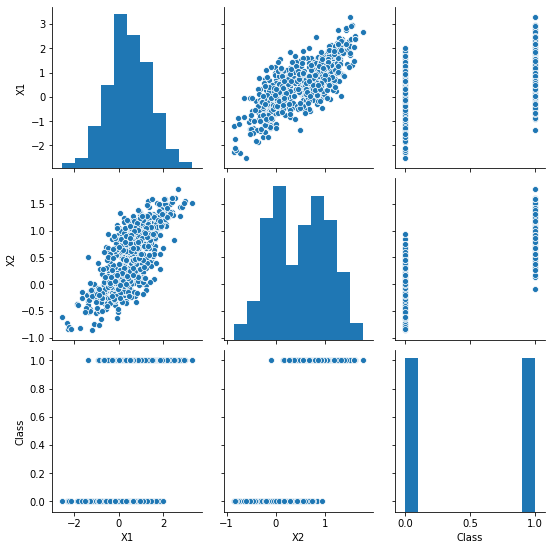

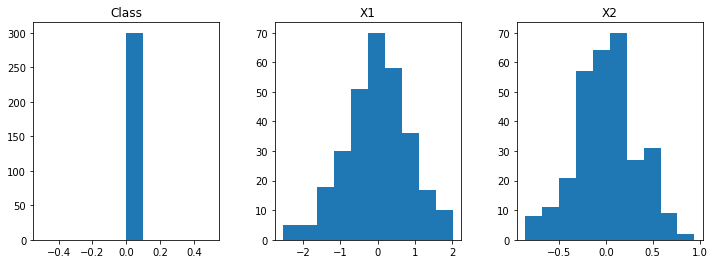

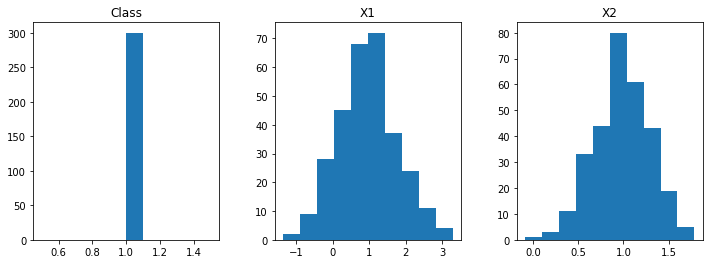

In [13]:
data2 = pd.read_csv('datset2.csv', header=0, names=['X1','X2','Class'], index_col=0)
data_toplevel(data2)  

## Step 3: Dataset 2 Discussion

## Step 1 and 2: Load and Explore Dataset 3

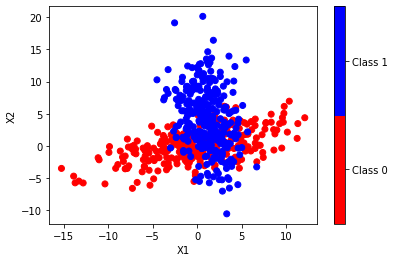

Data Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.477786,2.196081,0.500000
std,3.822859,4.382142,0.500417
min,-15.230715,-10.529514,0.000000
25%,-1.234267,-0.722251,0.000000
50%,0.802649,1.376222,0.500000
75%,2.632443,4.799941,1.000000
max,12.062268,20.120173,1.000000


Class 0 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,-0.122183,0.136718,0.0
std,4.984191,2.455616,0.0
min,-15.230715,-6.575621,0.0
25%,-3.303942,-1.457636,0.0
50%,0.094533,0.121755,0.0
75%,3.060031,1.661628,0.0
max,12.062268,6.951659,0.0


Class 1 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,1.077754,4.255444,1.0
std,1.926884,4.891850,0.0
min,-4.518710,-10.529514,1.0
25%,-0.052898,0.867808,1.0
50%,1.115572,4.123293,1.0
75%,2.427915,7.586508,1.0
max,6.669109,20.120173,1.0


Covariance of Class 0:

,X1,X2
X1,24.842163,6.922880
X2,6.922880,6.030051


Covariance of Class 1:

,X1,X2
X1,3.712883,-2.664862
X2,-2.664862,23.930196


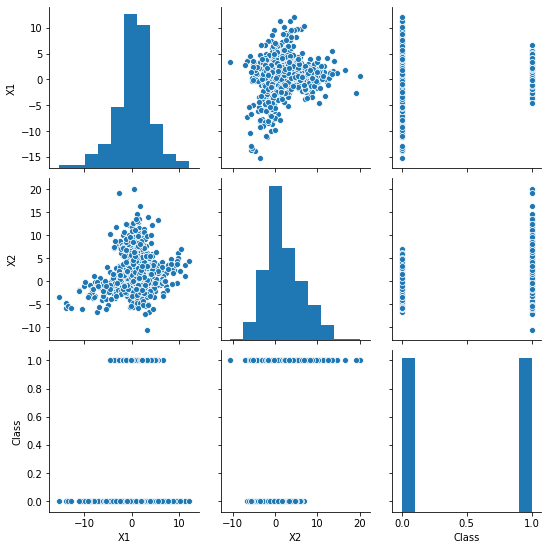

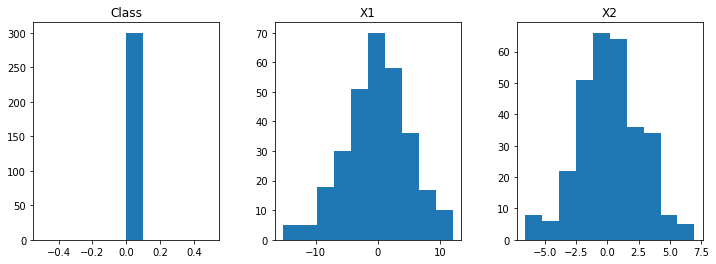

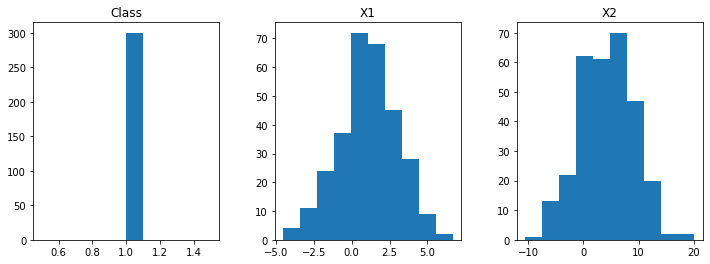

In [14]:
data3 = pd.read_csv('datset3.csv', header=0, names=['X1','X2','Class'], index_col=0)
data_toplevel(data3)  

## Step 3: Dataset 3 Discussion 

# Step 4:  Make function for Test/Training Split 

# Step 5: Fitting Classifiers

# Step 6: Use the model to estimate class probabilities on the test set

# Step 7:  Build a function to return ROC data

# Step 8: Generate ROC Data

# Step 9:  Compute and report ROC AUC

# Step 10:  Show Confusion matrices where Accuracy, Precision, Recall, and F-Measure are maximize

# Step 11: Plot ROC and Add annotations to the ROC graph 

# Step 12:  Answer Customer Questions
a.	For each dataset, describe which model you recommend the school use for their decision-making (and why).  
b.	Indicate which probability threshold value (or values) you would recommend they set the classifier to use if they wanted to balance the risk of false positives and false negatives.  
